# Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import sklearn

df = pd.read_csv("cardio_train2.csv")

# Here are the features of our dataset

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [2]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.shape

(70000, 13)

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
columns = df.columns
for col in columns:
    print('****',col,'****')
    print(df[col].describe())

**** id ****
count    70000.000000
mean     49972.419900
std      28851.302323
min          0.000000
25%      25006.750000
50%      50001.500000
75%      74889.250000
max      99999.000000
Name: id, dtype: float64
**** age ****
count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64
**** gender ****
count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64
**** height ****
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64
**** weight ****
count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000

In [6]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# Pre-Processing

## Let's drop ID since it doesn't really tell us anything

In [7]:
df.drop(columns = ['id'], inplace = True)

In [8]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## We also need to fix the Age column. It's in days, we should change it to years for easier reading. 

In [9]:
df['age'] = df['age'] / 365.25

In [10]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.676249,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.878166,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.199863,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.412731,1,163,72.0,135,80,1,2,0,0,0,1


# I also noticed something troubling, there are a lot of weird outlier values for our blood pressures

## After some research into diastolic and systolic blood pressures, I created my own boundaries of what would be realistic blood pressure rates or not. I dropped the columns outside of these boundaries.

In [11]:
df.drop(df.loc[df['ap_hi'] > 400].index, axis=0, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.676249,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.878166,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.199863,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.412731,1,163,72.0,135,80,1,2,0,0,0,1


In [12]:
df.ap_hi.describe()

count    69961.000000
mean       126.683695
std         18.218471
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        309.000000
Name: ap_hi, dtype: float64

In [13]:
df.ap_hi.sort_values()

35040   -150
23988   -140
46627   -120
25240   -120
16021   -115
        ... 
29652    240
56014    240
26053    240
42725    240
40330    309
Name: ap_hi, Length: 69961, dtype: int64

In [14]:
df.ap_lo.describe()

count    69961.000000
mean        96.646260
std        188.522444
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [15]:
df.ap_lo.sort_values()

60106      -70
17381        0
63787        0
48049        0
56950        0
         ...  
43434     9800
68538    10000
23849    10000
2381     10000
43326    11000
Name: ap_lo, Length: 69961, dtype: int64

In [16]:
df.drop(df.loc[df['ap_hi'] < 50].index, axis=0, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.676249,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.878166,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.199863,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.412731,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
df.drop(df.loc[df['ap_lo'] < 20].index, axis=0, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.676249,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.878166,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.199863,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.412731,1,163,72.0,135,80,1,2,0,0,0,1


In [18]:
df.drop(df.loc[df['ap_lo'] > 200].index, axis=0, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.676249,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.878166,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.199863,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.412731,1,163,72.0,135,80,1,2,0,0,0,1


In [19]:
df.describe

<bound method NDFrame.describe of              age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      50.357290       2     168    62.0    110     80            1     1   
1      55.381246       1     156    85.0    140     90            3     1   
2      51.627652       1     165    64.0    130     70            3     1   
3      48.249144       2     169    82.0    150    100            1     1   
4      47.841205       1     156    56.0    100     60            1     1   
...          ...     ...     ...     ...    ...    ...          ...   ...   
69995  52.676249       2     168    76.0    120     80            1     1   
69996  61.878166       1     158   126.0    140     90            2     2   
69997  52.199863       2     183   105.0    180     90            3     1   
69998  61.412731       1     163    72.0    135     80            1     2   
69999  56.235455       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0   

<Axes: >

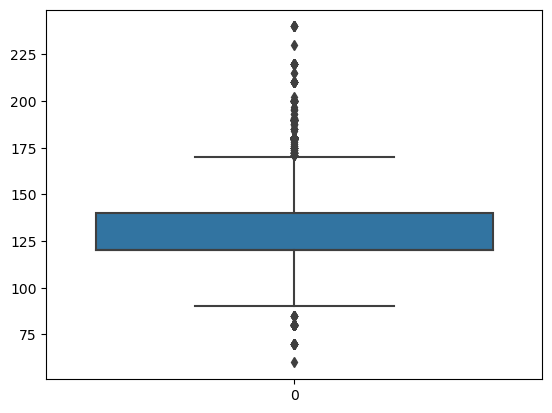

In [20]:
sns.boxplot(df['ap_hi'])

<Axes: >

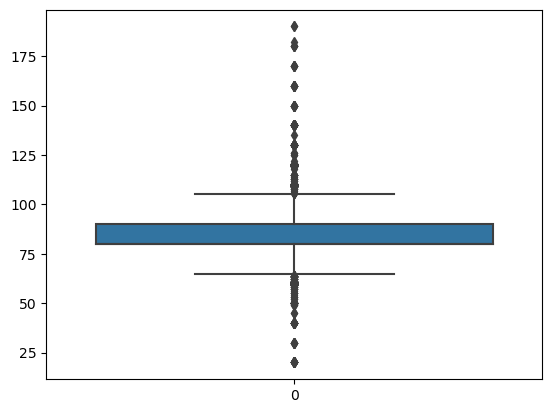

In [21]:
sns.boxplot(df['ap_lo'])

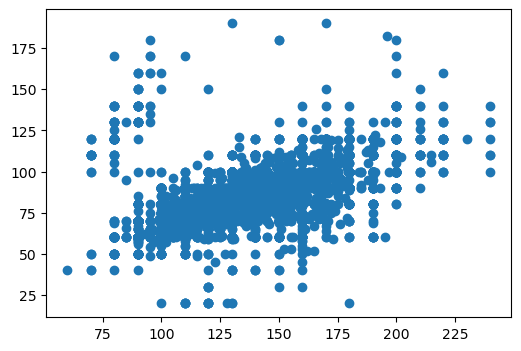

In [22]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['ap_hi'],df['ap_lo'])

# Modeling

In [23]:
#sns.pairplot(df)

In [24]:
X = df.drop(columns = ['cardio'])
y = df['cardio']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (55036, 11)
X_test (13759, 11)
y_train (55036,)
y_test (13759,)


In [28]:
from sklearn import tree

In [29]:
clf = tree.DecisionTreeClassifier()

In [30]:
clf = clf.fit(X_train, y_train)

In [31]:
predicted = clf.predict(X_test)

In [32]:
predicted

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
clf.score(X_test, y_test)

0.6332582309760884

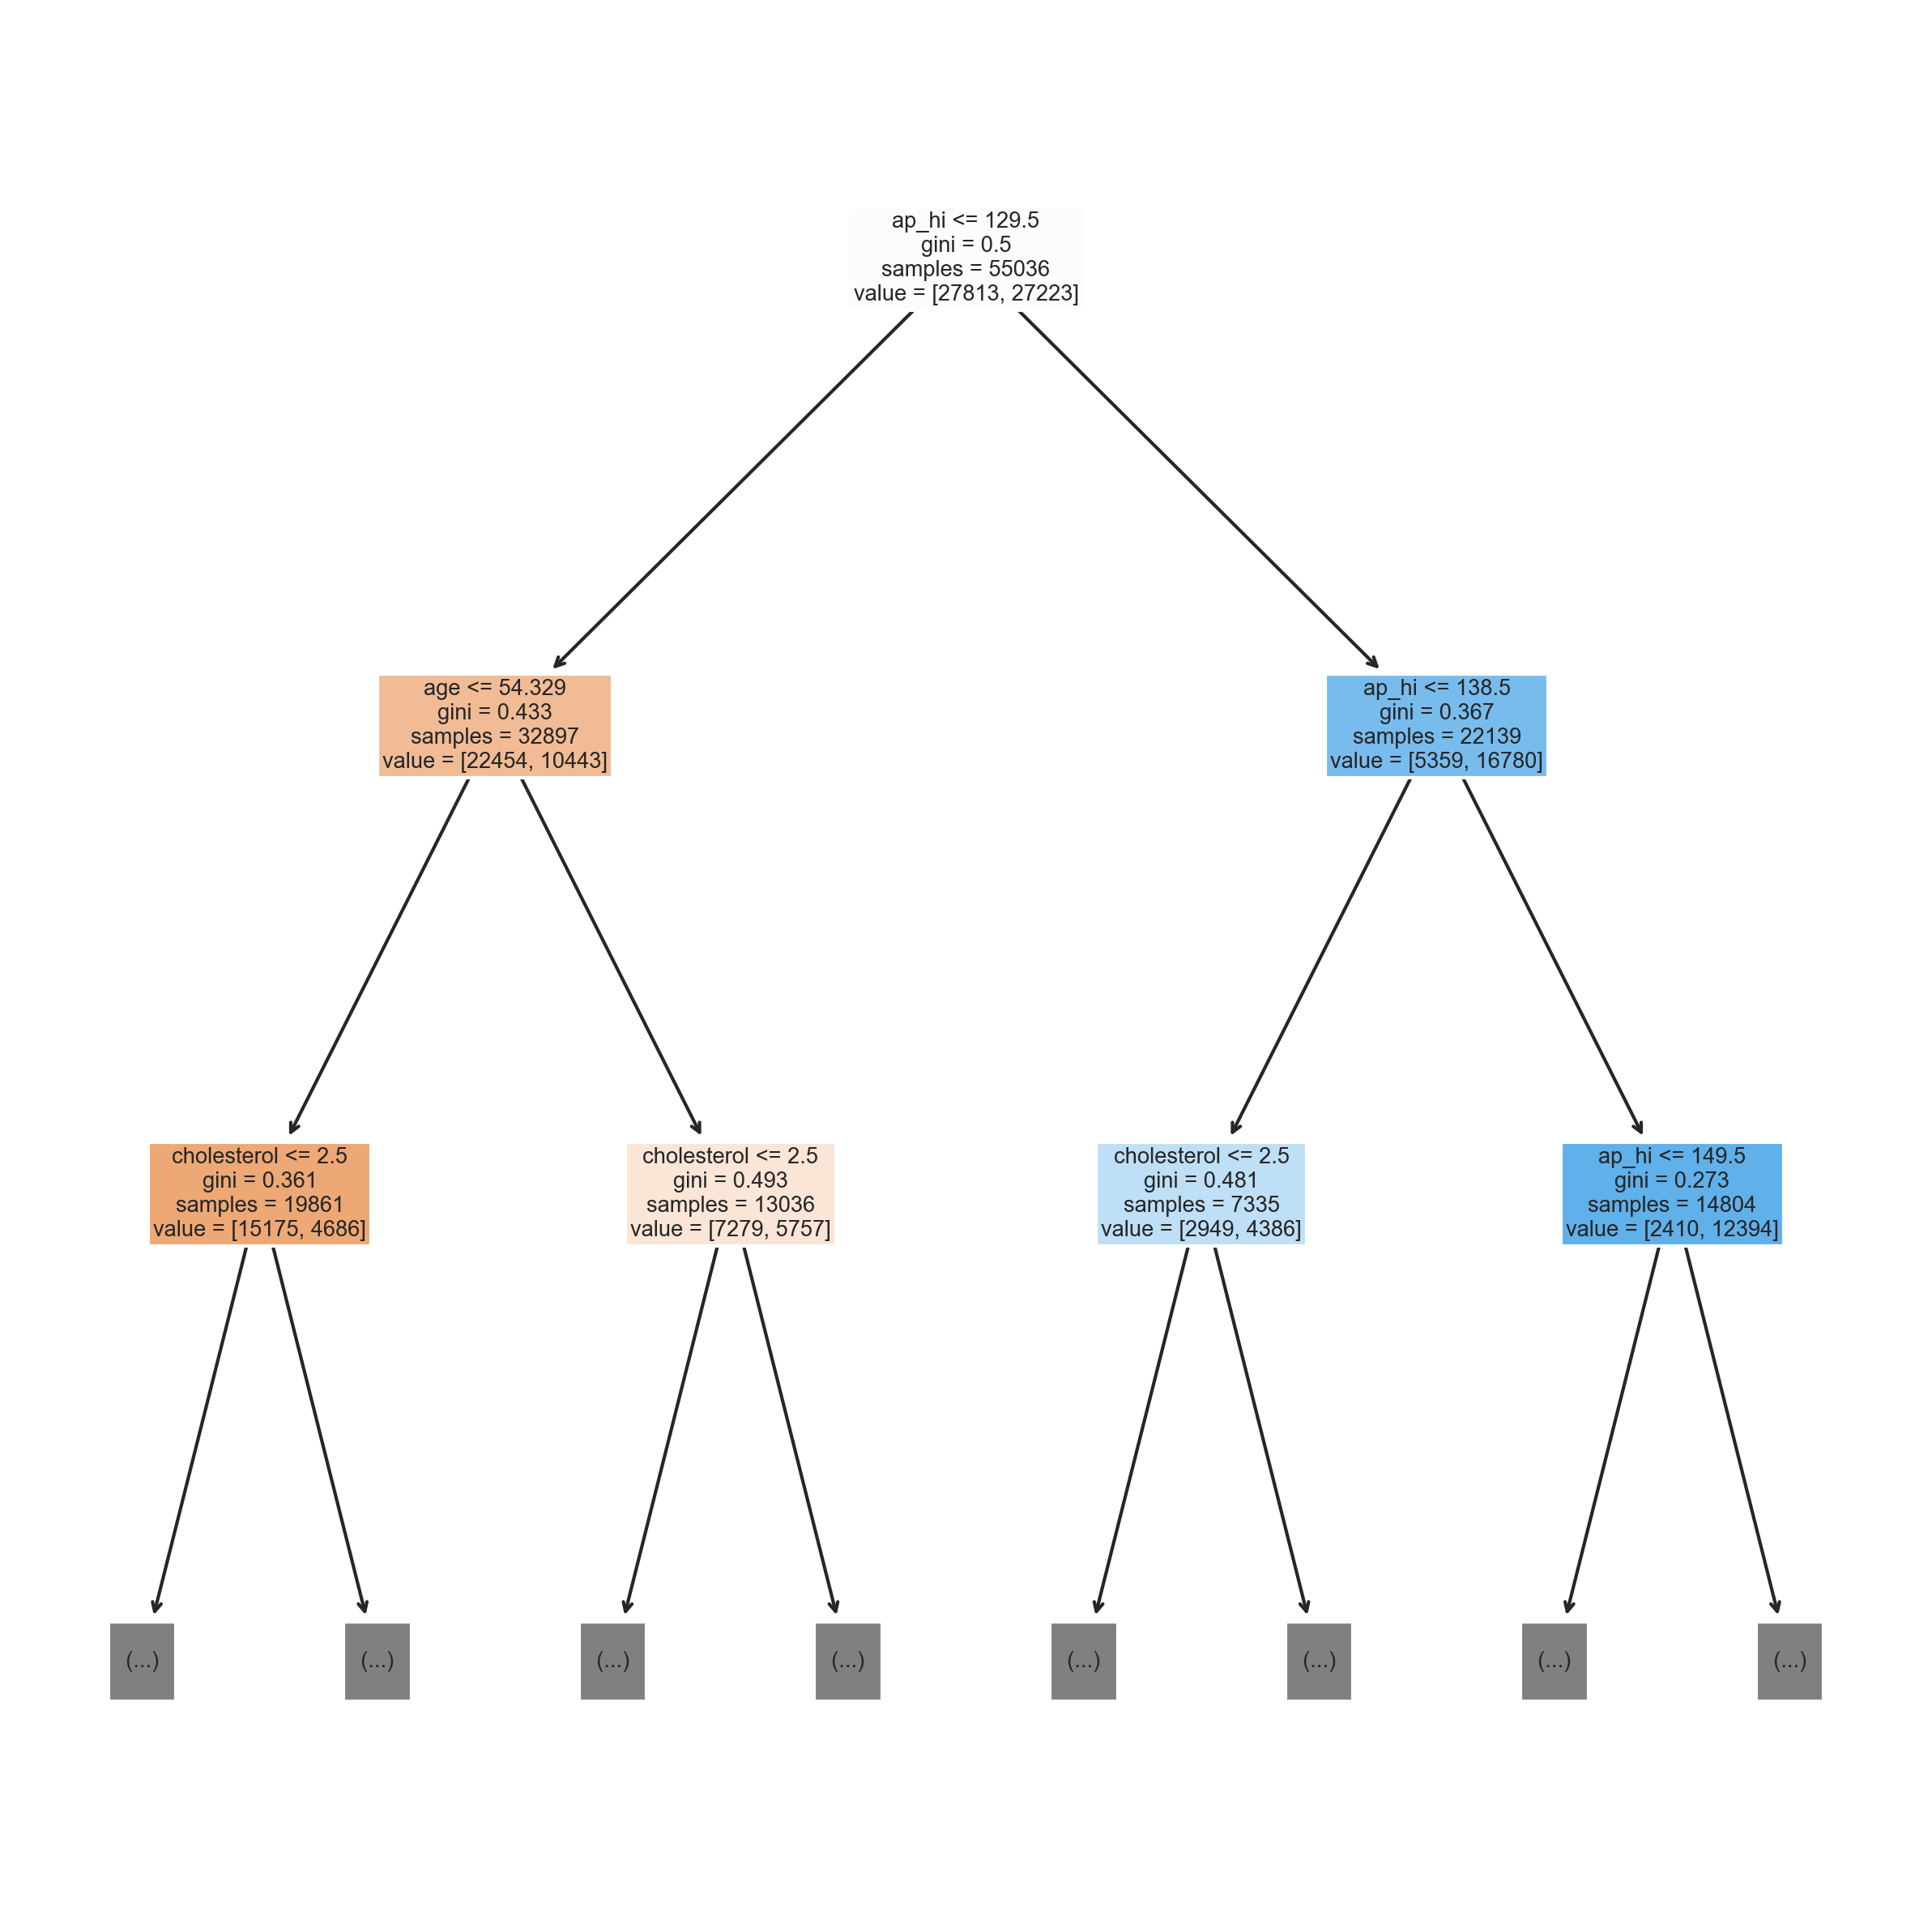

In [34]:
sns.set(font_scale=1.50)
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
tree.plot_tree(clf, max_depth = 2, feature_names = X.columns.tolist(), filled=True)
plt.show()

In [35]:
fi = clf.feature_importances_ 
fi = pd.Series(data = fi, index = X.columns) 
fi.sort_values(ascending=False, inplace=True) 

C:\Users\Spencer\AppData\Local\Temp\ipykernel_5900\2000570433.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


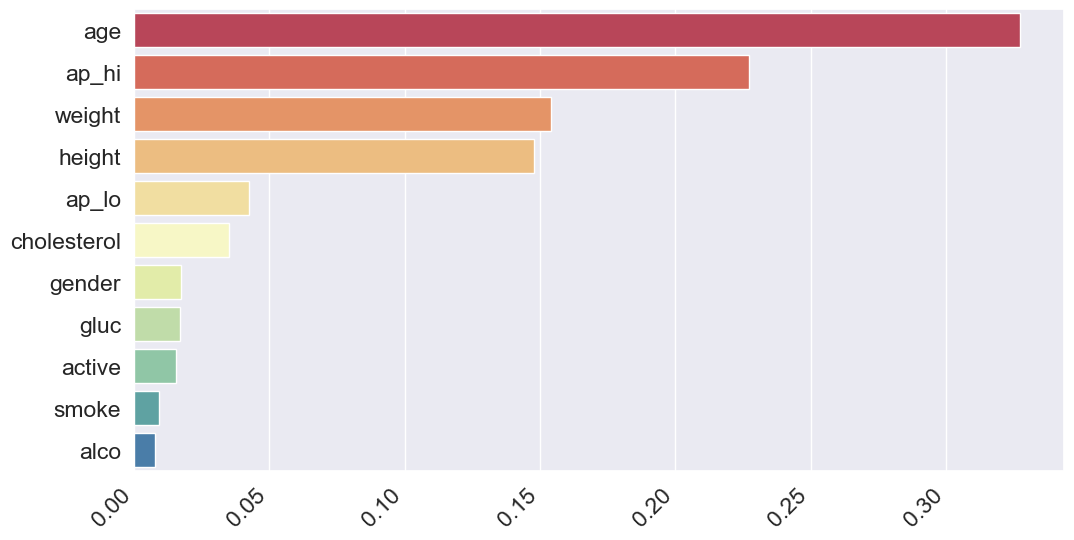

In [36]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("Spectral", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='ap_hi', ylabel='age'>

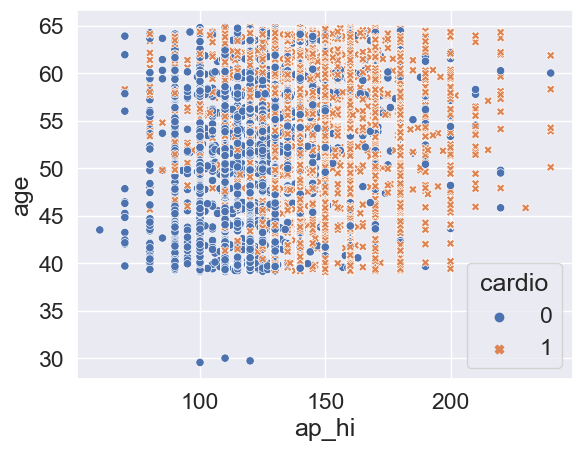

In [37]:
sns.scatterplot(data=df, x='ap_hi', y='age', hue = "cardio", style="cardio")

In [38]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [39]:
X2 = df.drop(columns = ["cardio", "age", "ap_hi"])
y2 = df['cardio']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

In [40]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X2_train, y2_train)

In [41]:
cvs = cross_validate(clf, X2, y2, cv = 10, return_estimator = True)

In [42]:
score = cvs['test_score'].mean()
score

0.6127188874464582

In [43]:
cvs['estimator']

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

In [44]:
fi = []
classification_reports = []
for i in cvs['estimator']:
    fi.append(list(i.feature_importances_))
    
    
#average column-wise 
fi_avg = np.mean(fi, axis = 0)

C:\Users\Spencer\AppData\Local\Temp\ipykernel_5900\2338836064.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


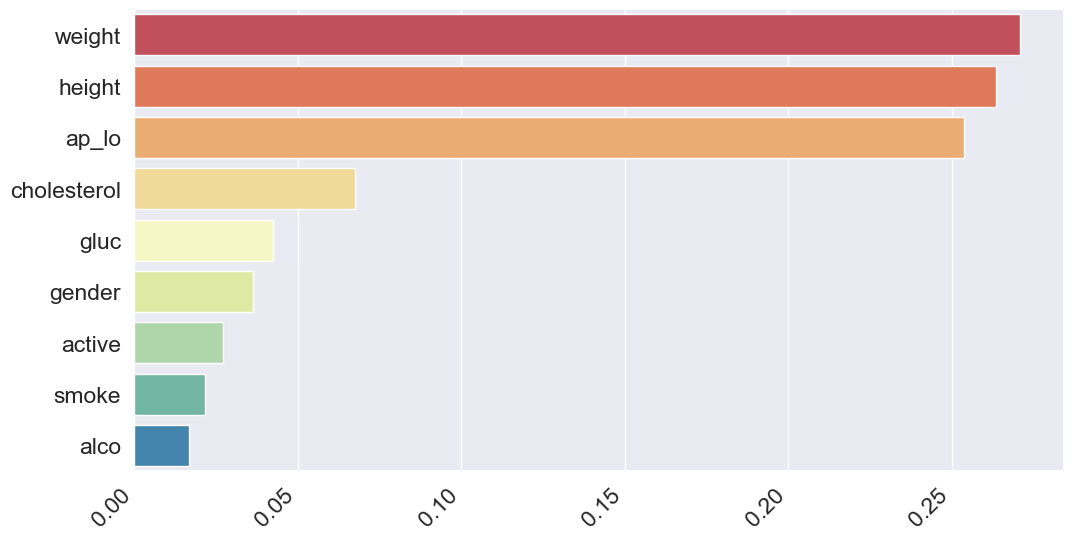

In [45]:
fi_avg = pd.Series(fi_avg, index = X2.columns.tolist()).sort_values(ascending=False) 

plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("Spectral", n_colors=len(fi_avg)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (25,15), dpi=600)
tree.plot_tree(clf2, max_depth =2 , feature_names = X2.columns.tolist(), filled=True)
plt.show()

<Axes: xlabel='weight', ylabel='height'>

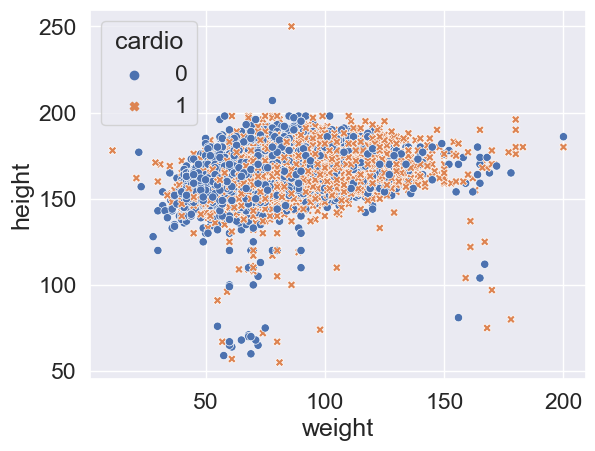

In [48]:
sns.scatterplot(data=df, x='weight', y='height', hue = "cardio", style="cardio")

In [49]:
#precision is most important
predicted2 = clf2.predict(X2_test)
print(metrics.classification_report(y2_test, predicted2))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65      6952
           1       0.63      0.52      0.57      6807

    accuracy                           0.61     13759
   macro avg       0.62      0.61      0.61     13759
weighted avg       0.62      0.61      0.61     13759



In [50]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6934
           1       0.63      0.63      0.63      6825

    accuracy                           0.63     13759
   macro avg       0.63      0.63      0.63     13759
weighted avg       0.63      0.63      0.63     13759

